In [10]:
import pandas as pd
import seaborn as sns
%matplotlib inline


In [11]:
df = pd.read_csv("train.csv")

In [12]:
df.shape

(53845, 9)

In [19]:
df.head()

df = df.drop(columns=['Reporting Agency', 'Cause', 'Subcause', 'Status'])

In [20]:
df = df.rename(columns={
    "EventId":"id",
    "Occurrence Local Date Time":"datetime"})

In [21]:
df.head()

,id,datetime,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,18.8371319682,-34.087051,8LOVJZ3


In [28]:
df.dtypes

id                   int64
datetime            object
longitude           object
latitude           float64
road_segment_id     object
dtype: object

In [31]:
pd.to_datetime(df.datetime)

0       2016-01-01 00:53:00
1       2016-01-01 00:54:00
2       2016-01-01 02:26:00
3       2016-01-01 02:56:00
4       2016-01-01 03:40:00
                ...        
53840   2018-12-31 21:14:00
53841   2018-12-31 21:33:00
53842   2018-12-31 22:01:00
53843   2018-12-31 22:12:00
53844   2018-12-31 23:45:00
Name: datetime, Length: 53845, dtype: datetime64[ns]

In [32]:
pd.to_numeric(df.longitude, errors='coerce')

0        18.540896
1        18.930756
2        18.553358
3        18.677556
4        18.837132
           ...    
53840    18.601735
53841    18.576595
53842    18.658576
53843    18.625080
53844    18.652948
Name: longitude, Length: 53845, dtype: float64

In [33]:
df.head()

,id,datetime,longitude,latitude,road_segment_id
0,60558,01/01/16 00:53,18.5408955032,-33.888275,S0B3CGQ
1,60559,01/01/16 00:54,18.9307563219,-34.140857,RYJYAPI
2,60560,01/01/16 02:26,18.5533575029,-33.959154,U3KP57C
3,60561,01/01/16 02:56,18.6775561589,-33.895258,RY0TRQ8
4,60562,01/01/16 03:40,18.8371319682,-34.087051,8LOVJZ3


* id (int)
* datetime (datetime)
* longitude (float)
* latitude (float)
* road_segment_id (categorical)

In [11]:
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(6,6)}) #Set our seaborn aesthetics (we're going to customize our figure size)

#Sometimes pandas gives us a lot of warnings, for the sake of simplicity, let's ignore them for this class
import warnings
warnings.filterwarnings("ignore")

In [56]:
df.shape

(53845, 5)

In [58]:
df.road_segment_id.nunique()

549

There are 549 unique road segments where an accident has occurred.


In [18]:
import geopandas as gpd
import fiona

In [25]:
road = gpd.read_file("road_segments")
road.head()

,ROADNO,CLASS,REGION,WIDTH,LANES,SURFTYPE,PAVETYPE,CONDITION,length_1,segment_id,geometry
0,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,D1U6OOF,"LINESTRING (18.65262 -33.97724, 18.65264 -33.9..."
1,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,NG4X2MD,"LINESTRING (18.65347 -33.97309, 18.65347 -33.9..."
2,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,792705Z,"LINESTRING (18.65431 -33.96894, 18.65432 -33.9..."
3,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,IK67XHB,"LINESTRING (18.65515 -33.96480, 18.65517 -33.9..."
4,R300,Primary,Western Cape,20.2,2,Paved,FLEX,Good,471.207,OWCF2MH,"LINESTRING (18.65600 -33.96065, 18.65602 -33.9..."


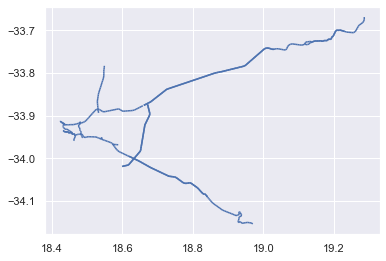

In [26]:
road.plot()